In [7]:
import nest
dir(nest)

['BeginSubnet',
 'CGConnect',
 'CGParse',
 'CGSelectImplementation',
 'CONN_LEN',
 'ChangeSubnet',
 'Cleanup',
 'Connect',
 'ConnectionRules',
 'CopyModel',
 'Create',
 'CurrentSubnet',
 'DLFCN',
 'DataConnect',
 'DisableStructuralPlasticity',
 'Disconnect',
 'DisconnectOneToOne',
 'EnableStructuralPlasticity',
 'EndSubnet',
 'GetChildren',
 'GetConnections',
 'GetDefaults',
 'GetKernelStatus',
 'GetLID',
 'GetLeaves',
 'GetNetwork',
 'GetNodes',
 'GetStatus',
 'GetStructuralPlasticityStatus',
 'Install',
 'LayoutNetwork',
 'Models',
 'NESTEngine',
 'NESTError',
 'NumProcesses',
 'Prepare',
 'PrintNetwork',
 'Rank',
 'ResetKernel',
 'ResetNetwork',
 'ResumeSimulation',
 'Run',
 'RunManager',
 'SLIDatum',
 'SLILiteral',
 'SetAcceptableLatency',
 'SetDefaults',
 'SetKernelStatus',
 'SetMaxBuffered',
 'SetStatus',
 'SetStructuralPlasticityStatus',
 'Simulate',
 'SuppressedDeprecationWarning',
 'Template',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__path__',


In [9]:
nest.Models()

(u'ac_generator',
 u'aeif_cond_alpha',
 u'aeif_cond_alpha_RK5',
 u'aeif_cond_alpha_multisynapse',
 u'aeif_cond_beta_multisynapse',
 u'aeif_cond_exp',
 u'aeif_psc_alpha',
 u'aeif_psc_delta',
 u'aeif_psc_exp',
 u'amat2_psc_exp',
 u'bernoulli_synapse',
 u'bernoulli_synapse_lbl',
 u'cont_delay_synapse',
 u'cont_delay_synapse_hpc',
 u'cont_delay_synapse_lbl',
 u'correlation_detector',
 u'correlomatrix_detector',
 u'correlospinmatrix_detector',
 u'dc_generator',
 u'diffusion_connection',
 u'diffusion_connection_lbl',
 u'erfc_neuron',
 u'gamma_sup_generator',
 u'gap_junction',
 u'gap_junction_lbl',
 u'gauss_rate_ipn',
 u'gif_cond_exp',
 u'gif_cond_exp_multisynapse',
 u'gif_pop_psc_exp',
 u'gif_psc_exp',
 u'gif_psc_exp_multisynapse',
 u'ginzburg_neuron',
 u'hh_cond_exp_traub',
 u'hh_psc_alpha',
 u'hh_psc_alpha_gap',
 u'ht_neuron',
 u'ht_synapse',
 u'ht_synapse_hpc',
 u'ht_synapse_lbl',
 u'iaf_chs_2007',
 u'iaf_chxk_2008',
 u'iaf_cond_alpha',
 u'iaf_cond_alpha_mc',
 u'iaf_cond_exp',
 u'iaf_cond

In [10]:
nest.Models?

In [21]:
import nest
neuron = nest.Create("iaf_psc_alpha")
nest.GetStatus(neuron)
nest.GetStatus(neuron, "I_e")
nest.GetStatus(neuron, ["V_reset", "V_th"])
nest.SetStatus(neuron, {"I_e": 376.0})
multimeter = nest.Create("multimeter")
nest.SetStatus(multimeter, {"withtime":True, "record_from":["V_m"]})
spikedetector = nest.Create("spike_detector",params={"withgid": True, "withtime": True})
nest.Connect(multimeter, neuron)
nest.Connect(neuron, spikedetector)
nest.Simulate(1000.0)


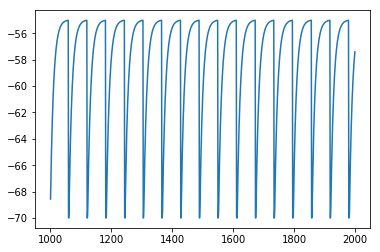

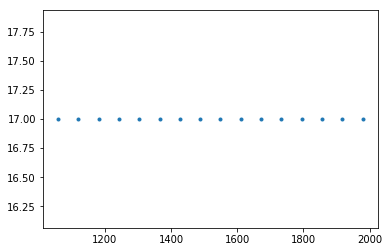

In [22]:
dmm = nest.GetStatus(multimeter)[0]
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]

import pylab
pylab.figure(1)
pylab.plot(ts, Vms)
dSD = nest.GetStatus(spikedetector,keys="events")[0]
evs = dSD["senders"]
ts = dSD["times"]
pylab.figure(2)
pylab.plot(ts, evs, ".")
pylab.show()

In [24]:
neuron2 = nest.Create("iaf_psc_alpha")
nest.SetStatus(neuron2 , {"I_e": 370.0})
nest.Connect(multimeter, neuron2)


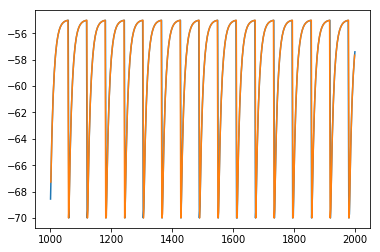

In [25]:
pylab.figure(2)
Vms1 = dmm["events"]["V_m"][::2] # start at index 0: till the end: each second entry
ts1 = dmm["events"]["times"][::2]
pylab.plot(ts1, Vms1)
Vms2 = dmm["events"]["V_m"][1::2] # start at index 1: till the end: each second entry
ts2 = dmm["events"]["times"][1::2]
pylab.plot(ts2, Vms2)

[[<matplotlib.lines.Line2D at 0x7fb2b0b9bad0>]]

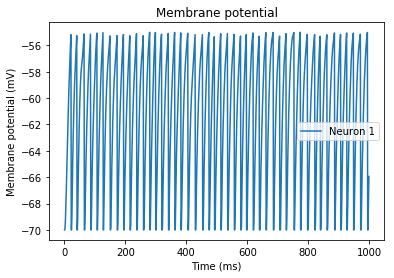

In [27]:

# -*- coding: utf-8 -*-
#
# one_neuron_with_noise.py
#
# This file is part of NEST.
#
# Copyright (C) 2004 The NEST Initiative
#
# NEST is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 2 of the License, or
# (at your option) any later version.
#
# NEST is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with NEST.  If not, see <http://www.gnu.org/licenses/>.

"""
One neuron with noise
----------------------
This script simulates a neuron with input from the Poisson generator, and
records the neuron's membrane potential.
KEYWORDS: iaf_psc_alpha, Poisson generator, voltmeter
"""

###############################################################################
# First, we import all necessary modules needed to simulate, analyze and
# plot our example. Additionally, we set the verbosity to only show warnings
# and reset the kernel.
# Resetting the kernel removes any nodes we may have created previously and
# resets the internal clock to zero. This allows us to execute the script
# several times in a Python shell without interference from previous NEST
# simulations.

import nest
import nest.voltage_trace

nest.set_verbosity("M_WARNING")
nest.ResetKernel()

###############################################################################
# Second, the nodes (the neuron, poisson generator (two of them), and the
# voltmeter) are created using  the `Create()` function.
# We store the returned handles in variables for later reference.

neuron = nest.Create("iaf_psc_alpha")
noise = nest.Create("poisson_generator", 2)
voltmeter = nest.Create("voltmeter")

###############################################################################
# Third, the voltmeter and the Poisson generator are configured using
# `SetStatus()`, which expects a list of node handles and a list of parameter
# dictionaries. Note that we do not need to set parameters for the neuron,
# since it has satisfactory defaults.
# We set each Poisson generator to 8 000 Hz and 15 000 Hz, respectively.
# For the voltmeter, we want to record the global id of the observed nodes and
# set the `withgid` flag of the voltmeter to ``True``.
# We also set its property `withtime` so it will also record the points
# in time at which it samples the membrane voltage.

nest.SetStatus(noise, [{"rate": 80000.0}, {"rate": 15000.0}])
nest.SetStatus(voltmeter, {"withgid": True, "withtime": True})

###############################################################################
# Fourth, the neuron is connected to the Poisson generator and to the
# voltmeter. We also specify the synaptic weight and delay in this step.

nest.Connect(noise, neuron, syn_spec={'weight': [[1.2, -1.0]], 'delay': 1.0})
nest.Connect(voltmeter, neuron)

###############################################################################
# Now we simulate the network using `Simulate()`, which takes the
# desired simulation time in milliseconds.

nest.Simulate(1000.0)

###############################################################################
# Finally, we plot the neuron's membrane potential as a function of
# time.

nest.voltage_trace.from_device(voltmeter)

[[<matplotlib.lines.Line2D at 0x7fb2b0c3d350>]]

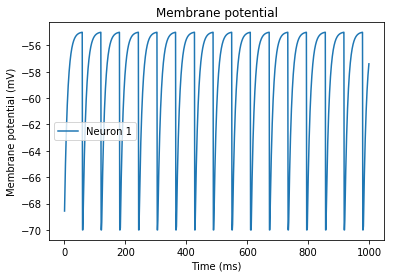

In [28]:
# -*- coding: utf-8 -*-
#
# one_neuron.py
#
# This file is part of NEST.
#
# Copyright (C) 2004 The NEST Initiative
#
# NEST is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 2 of the License, or
# (at your option) any later version.
#
# NEST is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with NEST.  If not, see <http://www.gnu.org/licenses/>.

'''
One neuron example
------------------
This script simulates a neuron driven by a constant external current
and records its membrane potential.
'''
# First, we import all necessary modules for simulation, analysis and
# plotting. Additionally, we set the verbosity to suppress info
# messages and reset the kernel.
# Resetting the kernel allows you to execute the script several
# times in a Python shell without interferences from previous NEST
# simulations. Thus, without resetting the kernel the network status
# including connections between nodes, status of neurons, devices and
# intrinsic time clocks, is kept and influences the next simulations.

import nest
import nest.voltage_trace
nest.set_verbosity("M_WARNING")
nest.ResetKernel()
# Second, the nodes (neurons and devices) are created using `Create()`.
# We store the returned handles in variables for later reference.
# The `Create` function also allow you to create multiple nodes
# e.g. nest.Create('iaf_psc_alpha',5)
# Also default parameters of the model can be configured using 'Create'
# by including a list of parameter dictionaries
# e.g. `nest.Create("iaf_psc_alpha", params=[{'I_e':376.0}])`
# or `nest.Create("voltmeter", [{"withgid": True, "withtime": True}])`.
# In this example we will configure these parameters in an additional
# step, which is explained in the third section.

neuron = nest.Create("iaf_psc_alpha")
voltmeter = nest.Create("voltmeter")
# Third, the neuron and the voltmeter are configured using
# `SetStatus()`, which expects a list of node handles and a list of
# parameter dictionaries.
# In this example we use `SetStatus()` to configure the constant
# current input to the neuron. We also want to record the global id of
# the observed nodes and set the withgid flag of the voltmeter to
# True.

nest.SetStatus(neuron, "I_e", 376.0)
nest.SetStatus(voltmeter, [{"withgid": True}])
# Fourth, the neuron is connected to the voltmeter. The command
# `Connect()` has different variants. Plain `Connect()` just takes the
# handles of pre- and post-synaptic nodes and uses the default values
# for weight and delay. Note that the connection direction for the voltmeter is
# reversed compared to the spike detector, because it observes the
# neuron instead of receiving events from it. Thus, `Connect()`
# reflects the direction of signal flow in the simulation kernel
# rather than the physical process of inserting an electrode into the
# neuron. The latter semantics is presently not available in NEST.

nest.Connect(voltmeter, neuron)
# Now we simulate the network using `Simulate()`, which takes the
# desired simulation time in milliseconds.

nest.Simulate(1000.0)
# Finally, we plot the neuron's membrane potential as a function of
# time.

nest.voltage_trace.from_device(voltmeter)

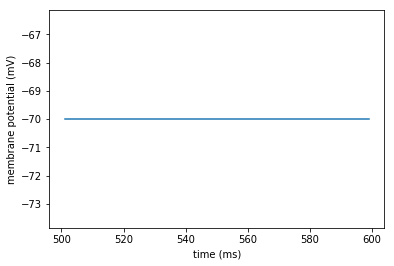

In [38]:
import pylab as pl
import nest # import NEST module
neuron = nest.Create('iaf_psc_exp')             # create a neuron
voltmeter = nest.Create('voltmeter')            # create a voltmeter
spikegenerator = nest.Create('spike_generator') # create a spike generator
nest.SetStatus(spikegenerator, {'spike_times': [10., 50.]}) # let it spike
# connect spike generator and voltmeter to the neuron
nest.Connect(spikegenerator, neuron, syn_spec={'weight': 1E3})
nest.Connect(voltmeter, neuron)

nest.Simulate(100.) # run the simulation

# read out recording time and voltage from voltmeter and plot them
times = nest.GetStatus(voltmeter)[0]['events']['times']
voltage = nest.GetStatus(voltmeter)[0]['events']['V_m']
pl.plot(times, voltage)
pl.xlabel('time (ms)');pl.ylabel('membrane potential (mV)')
pl.show()

[52.5]


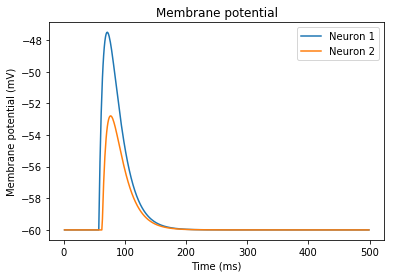

In [37]:
#*******************************************************************
#
#   A leaky integrate-and-fire neuron is created.
#   It gets a spike input at time t=55 ms
#   There is also an optional step current input at time t=50 ms that forces the neuron to spike
#
#*******************************************************************
from numpy import *
import pylab
import nest
import nest.voltage_trace
import nest.raster_plot

pylab.close('all')


###########################################
#  Parameter for the LIF neuron
###########################################
Rm = 10.0  # [MOhms]
Cm = 2000.  # [pF]
tau_m = Rm*Cm/1000.0  # membrane time constant [ms] = 20
tau_s = 10.0     # synaptic time constant [ms]
Trefract = 10.   # The refractory period of the LIF neuron [ms]
Vthresh = -45.   # The threshold potential of the LIF neuron [mV]
Vresting = -60.  # The resting potential of the LIF neuron [mV]

nrn_parameter_dict = {"V_m": Vresting,     # Membrane potential in mV
                      "E_L": Vresting,     # Resting membrane potential in mV
                      "C_m": Cm,           # Capacity of the membrane in pF
                      "tau_m": tau_m,      # Membrane time constant in ms
                      "t_ref": Trefract,   # Duration of refractory period in ms
                      "V_th": Vthresh,     # Spike threshold in mV
                      "V_reset": Vresting, # Reset potential of the membrane in mV

                      "tau_syn_ex": tau_s, # Time constant of the excitatory synaptic current in ms
                      "I_e": 0.0           # No constant external input current
                      }
# The other neuron parameters have default values.


# Reset the NEST Simulator
nest.ResetKernel()

###################################
# Create nodes
###################################

# Create the IAF neuron, see http://www.nest-simulator.org/cc/iaf_psc_exp/
neuron = nest.Create('iaf_psc_exp', 1, nrn_parameter_dict)
neuron2 = nest.Create('iaf_psc_exp', 1, nrn_parameter_dict)

# Create inputs
t_spike_input = 55.
t_step = 50.
step_duration = 0.5
step_amplitude = 60790.
# step_amplitude = 0.

#sine = nest.Create('ac_generator',1,{'amplitude':100.0,'frequency':2.0})
spike_gen = nest.Create("spike_generator", params={"spike_times": array([t_spike_input])})
step_gen = nest.Create('step_current_generator')
nest.SetStatus(step_gen, {'amplitude_times': array([t_step, t_step+step_duration]),
                          'amplitude_values': array([step_amplitude, 0.])})
# step_amplitude is in [pA]
# needs a large value to produce a spike

# Create voltmeter and spike recorder
voltmeter = nest.Create('voltmeter', 1, {'withgid': True})
spike_rec = nest.Create('spike_detector')

###################################
# Connect nodes
###################################

# Connect spike generator to neuron
# Note: The connection weight is given in [pA]
spike_gen_syn_spec = {'delay': 2., 'weight': 5000.}
nest.Connect(spike_gen, neuron, syn_spec=spike_gen_syn_spec)
nest.Connect(spike_gen, neuron2, syn_spec=spike_gen_syn_spec)

# Connect current step input step_gen to the neuron
# Note: The current amplitudes as defined above are multiplied with the weight.
nest.Connect(step_gen, neuron2, syn_spec={'delay': 2.})

# Connect voltmeter and spike recorder to neuron
nest.Connect(voltmeter, neuron)
nest.Connect(voltmeter, neuron2)
nest.Connect(neuron2, spike_rec)

###################################
# Now simulate
###################################
nest.Simulate(500.0)

###################################
# Analyze results and make plots
###################################


# Extract spikes voltage
spikes = nest.GetStatus(spike_rec)[0]['events']['times']
print(spikes)  # printing spikes for second experiment (neuron2)
# events = nest.GetStatus(spike_rec, 'events')
vm = nest.GetStatus(voltmeter, 'events')[0]['V_m']

# etc.
# Plot results
nest.voltage_trace.from_device(voltmeter)
pylab.show()
